In [2]:
import welly

In [3]:
project = welly.read_las("../../Data/*.LAS")

Loading wells: 100%|██████████| 8/8 [00:03<00:00,  2.13it/s]


In [ ]:
# For each log inside each well, figure out the unique curve name and alias them.
unique_well_logs = set()
for well in project:
    unique_well_logs.update(well.data.keys())

unique_well_logs

{'ATRT',
 'ATRX',
 'BATC',
 'CAL1',
 'DCAV',
 'DTC',
 'DTCO',
 'DTS',
 'DTSM',
 'ECGR',
 'GR',
 'GRARC',
 'GRD',
 'HDAR',
 'HROM',
 'HTNP',
 'NPHI',
 'P16H',
 'P34H',
 'RD',
 'RHOB',
 'RHOZ',
 'RS',
 'TNP',
 'TNPH'}

In [30]:
alias = {
    "Gamma": ["GR", "GRARC", "GRD"],
    "Density": ["RHOZ", "RHOB", "DEN", "RHOZ"],
    "Sonic": ["DT", "DTC", "DTCO", "DTSM"],
    "Caliper": ["CAL", "CALI", "CALS", "CAL1", "HDAR"],
    "Porosity SS": ['NPSS', 'DPSS'],
    "Resistivity": ["RS","RD"],
    "Neutron Porosity": ["NPHI","TNPH","TNP"]
}

In [51]:
project[0].df()

,GR,RS,RD,DTCO,DTSM,DCAV,RHOB,TNP
DEPT,,,,,,,,
490.0,17.6006,0.6898,0.3094,NaN,NaN,NaN,NaN,NaN
490.5,17.6006,0.6898,0.3094,NaN,NaN,NaN,NaN,NaN
491.0,17.6006,0.6898,0.3094,NaN,NaN,NaN,NaN,NaN
491.5,16.7792,0.6959,0.3141,NaN,NaN,NaN,NaN,NaN
492.0,15.9579,0.6959,0.3141,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5349.0,27.6572,60.8772,66.4609,NaN,NaN,NaN,NaN,NaN
5349.5,30.0506,66.3972,70.7882,NaN,NaN,NaN,NaN,NaN
5350.0,NaN,67.1936,72.7930,NaN,NaN,NaN,NaN,NaN


In [ ]:
project[0].df(keys=[alias.keys()], alias=alias)

,Gamma,Density,Sonic,Resistivity,Neutron Porosity
DEPT,,,,,
490.0,17.6006,NaN,NaN,0.6898,NaN
490.5,17.6006,NaN,NaN,0.6898,NaN
491.0,17.6006,NaN,NaN,0.6898,NaN
491.5,16.7792,NaN,NaN,0.6959,NaN
492.0,15.9579,NaN,NaN,0.6959,NaN
...,...,...,...,...,...
5349.0,27.6572,NaN,NaN,60.8772,NaN
5349.5,30.0506,NaN,NaN,66.3972,NaN
5350.0,NaN,NaN,NaN,67.1936,NaN


Well(uwi: '', name: 'Poseidon 2', 8 curves: ['GR', 'RS', 'RD', 'DTCO', 'DTSM', 'DCAV', 'RHOB', 'TNP'])


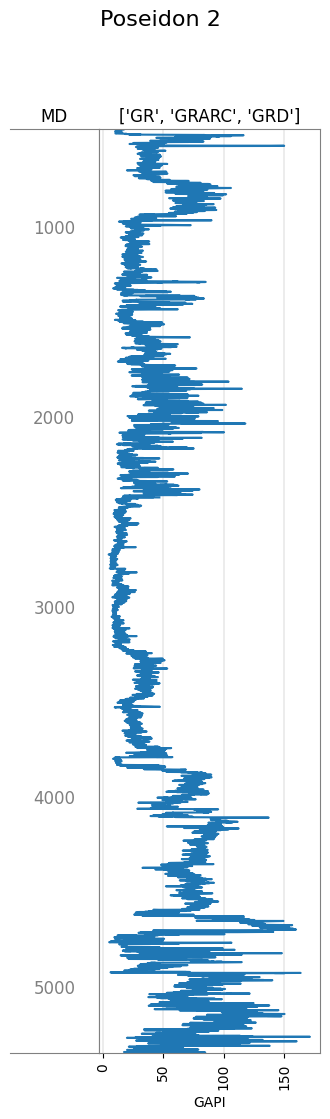

In [36]:
print(project[0])
project[0].plot(tracks = ['MD',alias.get('Gamma')])
